# Replicate figure of simulation study of bipartite Erdos-Renyi networks with 
# no interventions

In [1]:
using Pkg
# change this if the path is different
path_to_FinNetValu = "/Users/wolfgang/Desktop/Uni/HIWI/Bertschinger/SysRisk/Code/FinNetValu/"
Pkg.activate(path_to_FinNetValu)

"/Users/wolfgang/Desktop/Uni/HIWI/Bertschinger/SysRisk/Code/FinNetValu/Project.toml"

In [2]:
using FinNetValu
import Distributions.Uniform
using Plots
pyplot(legend=false)

┌ Info: Recompiling stale cache file /Users/wolfgang/.julia/compiled/v1.0/FinNetValu/88Ew8.ji for FinNetValu [2b4a169e-d971-11e8-348f-a5a54fd349b0]
└ @ Base loading.jl:1190


Plots.PyPlotBackend()

#### global parameters

In [13]:
N = 25  # banks
M = 30  # assets

# bank parameters
liq_asset_frac = 0.2
ext_asset_frac = 0.8
cap_frac = 0.1

# Asset shock parameters
loss = 0.3
α = 1.0536

nsim = 500;

500

In [5]:
total_assets = ones(N)
aᵉ = total_assets * ext_asset_frac
aⁱ = total_assets * liq_asset_frac
cap = total_assets * cap_frac
d = aᵉ + aⁱ - cap;

In [14]:
# create bipartite erdos renyi graphs representing 30 asset classes and 25 banks
# vary the average node degree between 0 and 14, for each degree value create
# `nsim` graphs
k_array = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 8, 10, 12, 14]
failed_banks = ones(length(k_array), nsim)
for i in 1:length(k_array)
    
    p = k_array[i]/N
    
    for j in 1:nsim
    
        A = erdosrenyi(N, M, p)
        
        aⁱ = total_assets * liq_asset_frac
        # Fix banks with no connections to external assets
        aⁱ[vec(sum(A, dims=2) .== 0)] .= 1

        # create network model
        fsmodel = FSModel(A, aᵉ, aⁱ, d, α=α)
        
        # randomly choose an asset and shock by 30%
        a = ones(M)
        a[rand(1:M, 1)] *= loss
        
        # run fixed point calculation
        fp = fixvalue(fsmodel, a, m=0)

        failed_banks[i, j] = N - sum(solvent(fsmodel, fp))
        
    end
end

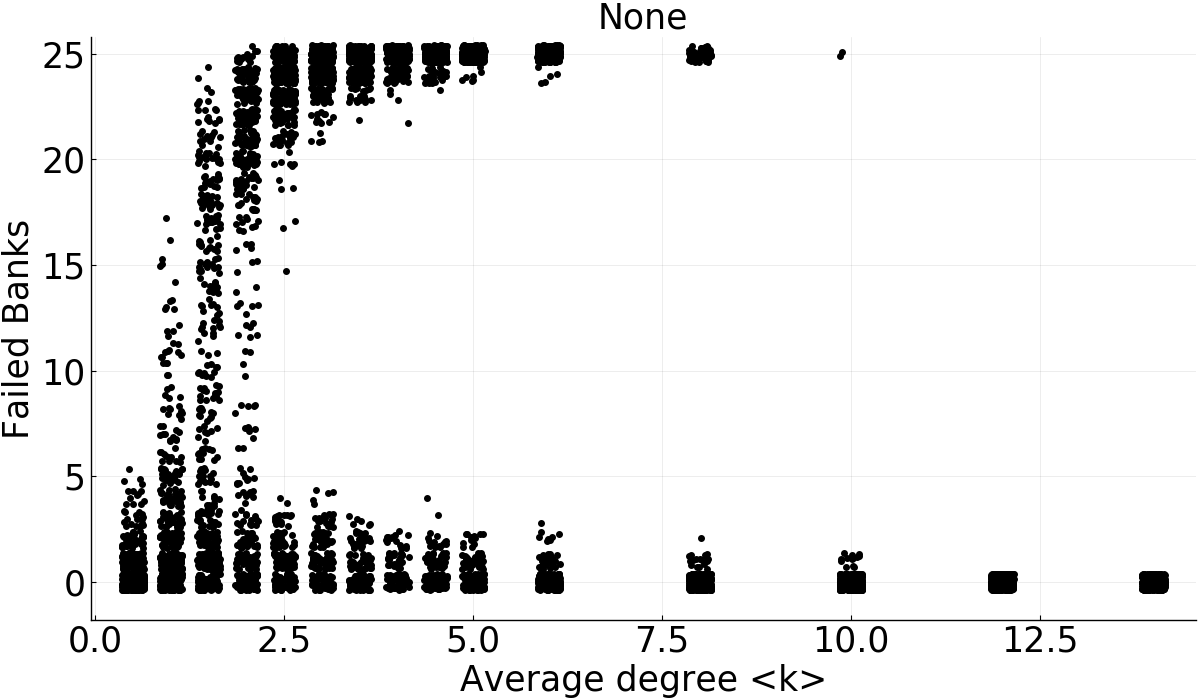

In [15]:
scatter(repeat(k_array, outer=(1,nsim)) .+
        rand(Uniform(-0.15, 0.15), length(k_array), nsim),
        failed_banks .+
        rand(Uniform(-0.4, 0.4), length(k_array), nsim),
        title = "None",
        xlabel = "Average degree <k>",
        ylabel = "Failed Banks",
        ylim=[-1., 25.],
        color="black",
        legend=false,
        titlefont=font(25),
        tickfont=font(25),
        guidefont=font(25),
        size=(1200, 700))